In [41]:
import os
from PIL import Image
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import tensorflow as tf
import keras.backend as K
from keras.optimizers import legacy
from keras import layers, models
from keras.layers import Input
from keras.models import Model, Sequential
from keras.layers import Input, Reshape, Dense, Dropout, Flatten, LeakyReLU, Conv2D, Conv2DTranspose
from keras.layers import LeakyReLU, Conv2D, UpSampling2D
from keras.layers import BatchNormalization
from keras.models import Model, Sequential
from keras.initializers import RandomNormal
from tqdm import tqdm
from keras import Input
from keras.models import Model
from keras.optimizers import RMSprop
from keras.optimizers import Adam
import pandas as pd
K.clear_session()

In [10]:
def load_images(folder_path, target_size=(224, 224)):
    images = []
    labels = []
    label_map = {}
    label_counter = 0

    for folder_name in os.listdir(folder_path):
        if os.path.isdir(os.path.join(folder_path, folder_name)):
            label_map[folder_name] = label_counter
            label_counter += 1
            for filename in os.listdir(os.path.join(folder_path, folder_name)):
                img_path = os.path.join(folder_path, folder_name, filename)
                try:
                    img = Image.open(img_path)
                    img = img.resize(target_size) 
                    img = img.convert('RGB') 
                    img_array = np.array(img)
                    images.append(img_array)
                    labels.append(label_map[folder_name])
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")

    return np.array(images), np.array(labels)


folder_path = 'farm_insects'
images, labels = load_images(folder_path)


c:\Users\Aka_Zeyrox\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [12]:
label_counts = Counter(labels)
for label, count in label_counts.items():
    print(f"Class {label}: {count} images")


Class 0: 97 images
Class 1: 88 images
Class 2: 96 images
Class 3: 114 images
Class 4: 104 images
Class 5: 104 images
Class 6: 112 images
Class 7: 115 images
Class 8: 110 images
Class 9: 113 images
Class 10: 101 images
Class 11: 119 images
Class 12: 109 images
Class 13: 109 images
Class 14: 100 images


In [13]:
print("Shape of images array:", images.shape)

print("Shape of labels array:", labels.shape)

num_classes = len(np.unique(labels))
print("Number of classes:", num_classes)

print("Min pixel value:", np.min(images))
print("Max pixel value:", np.max(images))
print("Mean pixel value:", np.mean(images))
print("Standard deviation of pixel values:", np.std(images))


Shape of images array: (1591, 224, 224, 3)
Shape of labels array: (1591,)
Number of classes: 15
Min pixel value: 0
Max pixel value: 255
Mean pixel value: 117.61616747014055
Standard deviation of pixel values: 69.87768799254053


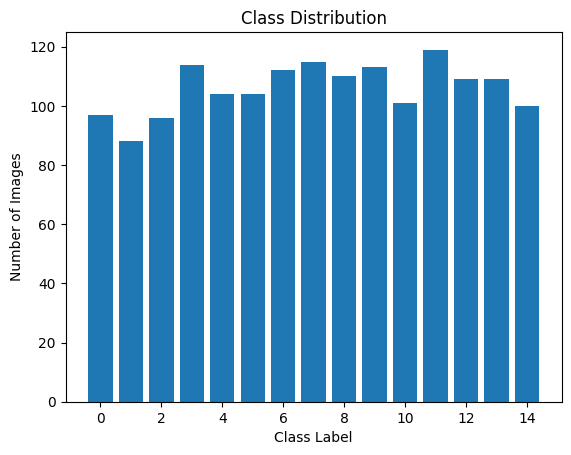

In [14]:
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel('Class Label')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

X_train_processed = np.array([np.array(Image.fromarray(img).convert('RGB').resize((224, 224))) for img in X_train])
X_test_processed = np.array([np.array(Image.fromarray(img).convert('RGB').resize((224, 224))) for img in X_test])
y_train_one_hot = to_categorical(y_train, num_classes=15)
y_test_one_hot = to_categorical(y_test, num_classes=15)

print("Train set - X:", X_train_processed.shape, " y:", y_train_one_hot.shape)
print("Test set - X:", X_test_processed.shape, " y:", y_test_one_hot.shape)

Train set - X: (1272, 224, 224, 3)  y: (1272, 15)
Test set - X: (319, 224, 224, 3)  y: (319, 15)


In [16]:
V2B1 = tf.keras.applications.efficientnet.EfficientNetB0(
    include_top=False,
    weights='imagenet')
for i in V2B1.layers:
    i.trainable =False

In [17]:
model= tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224,224,3)),
    V2B1,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(15,activation='softmax')      
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 15)                19215     
                                                                 
Total params: 4,068,786
Trainable params: 19,215
Non-trainable params: 4,049,571
_________________________________________________________________


In [20]:
model.compile(loss='CategoricalCrossentropy'
               ,optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,)
               ,metrics=['accuracy'])

In [21]:
history = model.fit(X_train_processed, y_train_one_hot, epochs=10, validation_data=(X_test_processed, y_test_one_hot))

Epoch 1/10
40/40 [==============================] - 21s 146ms/step - loss: 2.0598 - accuracy: 0.4237 - val_loss: 1.4224 - val_accuracy: 0.6520
Epoch 2/10
40/40 [==============================] - 3s 83ms/step - loss: 1.1909 - accuracy: 0.7036 - val_loss: 1.0556 - val_accuracy: 0.7398
Epoch 3/10
40/40 [==============================] - 3s 84ms/step - loss: 0.9031 - accuracy: 0.7657 - val_loss: 0.9135 - val_accuracy: 0.7618
Epoch 4/10
40/40 [==============================] - 3s 84ms/step - loss: 0.7474 - accuracy: 0.8176 - val_loss: 0.8342 - val_accuracy: 0.7743
Epoch 5/10
40/40 [==============================] - 3s 85ms/step - loss: 0.6405 - accuracy: 0.8498 - val_loss: 0.7817 - val_accuracy: 0.7868
Epoch 6/10
40/40 [==============================] - 3s 83ms/step - loss: 0.5655 - accuracy: 0.8664 - val_loss: 0.7485 - val_accuracy: 0.7806
Epoch 7/10
40/40 [==============================] - 3s 83ms/step - loss: 0.5078 - accuracy: 0.8829 - val_loss: 0.7240 - val_accuracy: 0.7806
Epoch 8/10


In [22]:
y_pred = model.predict(X_test_processed)
y_pred_classes = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred_classes)
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)

10/10 [==============================] - 3s 62ms/step
Accuracy: 0.774294670846395
Precision: 0.7741325742398174
Recall: 0.774294670846395
F1-score: 0.770807703261982
Confusion Matrix:
 [[19  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  1  0  0  0  0  0  0  1  2  0  0]
 [ 0  0  9  1  0  0  0  0  1  9  0  0  1  0  0]
 [ 1  1  0 26  0  1  0  0  1  0  0  0  0  0  0]
 [ 0  1  0  0 17  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0 27  0  0  0  1  1  0  0  0]
 [ 0  0  0  0  0  0  0 18  2  1  0  0  0  0  2]
 [ 0  2  0  0  1  1  0  5 10  0  0  0  0  0  0]
 [ 0  0  6  2  0  0  0  2  1  7  0  1  0  0  1]
 [ 0  0  1  0  0  0  1  1  0  0 20  0  0  0  0]
 [ 0  1  0  1  0  0  1  0  0  0  0 12  0  0  0]
 [ 1  1  0  0  1  0  0  0  0  1  1  3 13  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0  1  2  1  0  0  0  0  0 19]]


In [23]:
classes_with_errors = {}
total_errors = 0
for i in range(len(conf_matrix)):
    num_errors = np.sum(conf_matrix[i, :]) - conf_matrix[i, i]  
    if num_errors > 0:
        classes_with_errors[i] = num_errors
        total_errors += num_errors
        
for cls, num_errors in classes_with_errors.items():
    print(f"Class {cls}: {num_errors} ❌")

print("Total number of wrong predictions:", total_errors)


Class 1: 4 ❌
Class 2: 12 ❌
Class 3: 4 ❌
Class 4: 2 ❌
Class 5: 2 ❌
Class 6: 2 ❌
Class 7: 5 ❌
Class 8: 9 ❌
Class 9: 13 ❌
Class 10: 3 ❌
Class 11: 3 ❌
Class 12: 8 ❌
Class 13: 1 ❌
Class 14: 4 ❌
Total number of wrong predictions: 72


<h1 style="color:green;">Data augmentation layer</h1>

In [24]:
agm= tf.keras.Sequential([
    tf.keras.layers.RandomCrop(height=224, width=224),
    tf.keras.layers.RandomZoom(height_factor=(0.2,0.3)),
    tf.keras.layers.RandomFlip(mode='horizontal_and_vertical'),
    tf.keras.layers.Reshape((224,224,3))])

In [31]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224,224,3)),
    agm,
    V2B1,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(15,activation='softmax')
                
])

In [32]:
model_1.compile(loss='CategoricalCrossentropy'
               ,optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,)
               ,metrics=['accuracy'])

In [34]:
history_1= model_1.fit(X_train_processed, y_train_one_hot, epochs=10, validation_data=(X_test_processed, y_test_one_hot))

Epoch 1/10
40/40 [==============================] - 15s 375ms/step - loss: 1.5834 - accuracy: 0.5597 - val_loss: 1.2548 - val_accuracy: 0.6583
Epoch 2/10
40/40 [==============================] - 14s 347ms/step - loss: 1.1633 - accuracy: 0.6730 - val_loss: 1.0452 - val_accuracy: 0.7116
Epoch 3/10
40/40 [==============================] - 15s 374ms/step - loss: 0.9482 - accuracy: 0.7500 - val_loss: 0.9379 - val_accuracy: 0.7179
Epoch 4/10
40/40 [==============================] - 13s 325ms/step - loss: 0.8070 - accuracy: 0.7814 - val_loss: 0.8795 - val_accuracy: 0.7335
Epoch 5/10
40/40 [==============================] - 13s 336ms/step - loss: 0.7123 - accuracy: 0.8160 - val_loss: 0.8323 - val_accuracy: 0.7524
Epoch 6/10
40/40 [==============================] - 15s 383ms/step - loss: 0.6412 - accuracy: 0.8388 - val_loss: 0.8053 - val_accuracy: 0.7586
Epoch 7/10
40/40 [==============================] - 14s 338ms/step - loss: 0.5810 - accuracy: 0.8593 - val_loss: 0.7852 - val_accuracy: 0.7492

<Axes: >

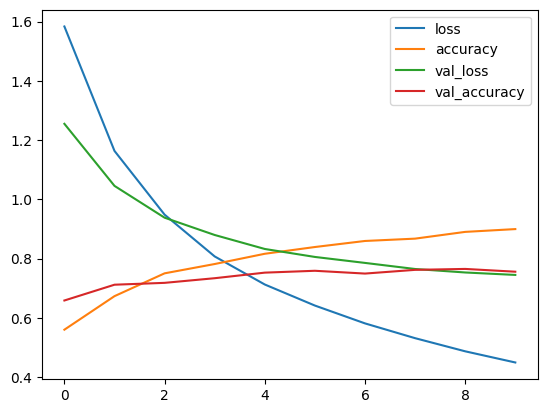

In [42]:
d = pd.DataFrame.from_dict(history_1.history)
d.plot()

In [35]:
y_pred = model_1.predict(X_test_processed)
y_pred_classes = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred_classes)
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)

10/10 [==============================] - 3s 63ms/step
Accuracy: 0.7554858934169278
Precision: 0.7546243153513821
Recall: 0.7554858934169278
F1-score: 0.7500340427187341
Confusion Matrix:
 [[19  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 15  0  0  1  0  0  0  0  0  0  0  2  0  0]
 [ 0  0 12  0  0  0  0  0  0  7  0  0  0  1  1]
 [ 1  1  0 26  0  1  1  0  0  0  0  0  0  0  0]
 [ 0  1  2  0 15  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  1  0  0  0  1  0]
 [ 0  0  0  0  0  0 26  0  0  0  1  1  0  0  1]
 [ 0  0  0  0  0  0  0 19  1  1  0  0  0  0  2]
 [ 0  1  1  0  1  1  1  4  8  0  0  0  0  0  2]
 [ 0  0  8  2  0  0  0  0  1  7  1  1  0  0  0]
 [ 1  0  0  1  0  0  0  1  1  0 19  0  0  0  0]
 [ 0  2  0  1  1  1  0  0  0  0  0  7  1  2  0]
 [ 0  2  0  0  1  0  0  0  0  1  1  2 14  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0  1  3  0  1  0  0  0  0 18]]


In [36]:
classes_with_errors = {}
total_errors = 0
for i in range(len(conf_matrix)):
    num_errors = np.sum(conf_matrix[i, :]) - conf_matrix[i, i]  
    if num_errors > 0:
        classes_with_errors[i] = num_errors
        total_errors += num_errors
        
for cls, num_errors in classes_with_errors.items():
    print(f"Class {cls}: {num_errors} ❌")

print("Total number of wrong predictions:", total_errors)

Class 1: 3 ❌
Class 2: 9 ❌
Class 3: 4 ❌
Class 4: 4 ❌
Class 5: 2 ❌
Class 6: 3 ❌
Class 7: 4 ❌
Class 8: 11 ❌
Class 9: 13 ❌
Class 10: 4 ❌
Class 11: 8 ❌
Class 12: 7 ❌
Class 13: 1 ❌
Class 14: 5 ❌
Total number of wrong predictions: 78


<h3 style="color:green;">after using the dataset for classification using both the base and data augmented layer we notice that the class 12 and 9 produce the most errors</h3>

In [417]:
def load_images(folder_path, img_size=(128, 128)):
    X = []
    limit = 50000
    for img_name in tqdm(os.listdir(folder_path)):
        if img_name.lower().endswith('.jpg') or img_name.lower().endswith('.png'):  # Check if the file has a ".jpg" or ".png" extension
            img_path = os.path.join(folder_path, img_name)
            img_array = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)  # Load the image with alpha channel
            if img_array is None:
                print(f"Skipping image {img_path} as it couldn't be loaded.")
                continue
            if img_array.shape[2] == 4:  # If the image has 4 channels (RGBA)
                img_array = cv2.cvtColor(img_array, cv2.COLOR_RGBA2RGB)  # Convert RGBA to RGB
            img_array = cv2.resize(img_array, img_size)
            img_array = img_array[:, :, ::-1]  # Convert BGR to RGB
            X.append(img_array / 255.0)
            if len(X) >= limit:
                break
    return np.array(X)

# Example usage:
dir_path = r"farm_insects/Fall Armyworms"
img_size = (64, 64)
X_train = load_images(dir_path, img_size)
print("Loaded images shape:", X_train.shape)


100%|██████████| 113/113 [00:02<00:00, 42.73it/s]

Loaded images shape: (106, 64, 64, 3)


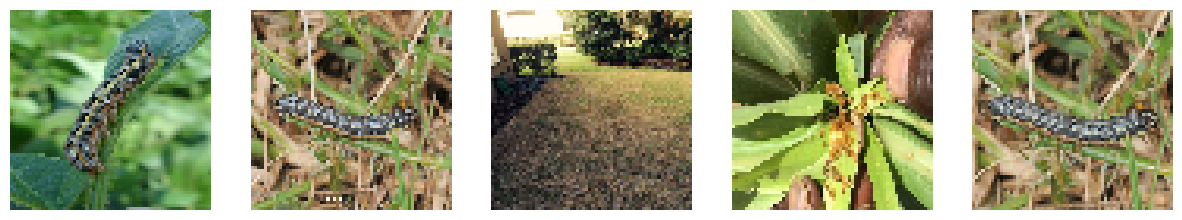

In [418]:
def display_images(images, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i in range(num_images):
        axes[i].imshow(images[i])
        axes[i].axis('off')
    plt.show()

# Display the loaded images and labels
display_images(X_train )


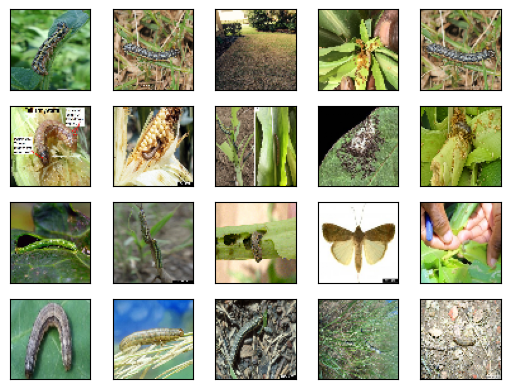

In [419]:
def show_images(images):
    for i in range(20):
        plt.subplot(4, 5, i + 1)
        plt.imshow(images[i])
        plt.xticks([])
        plt.yticks([])
    plt.show()
show_images(X_train)

In [420]:
print("Shape of images array:", X_train.shape)

Shape of images array: (106, 64, 64, 3)


In [421]:
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true"
K.clear_session()
X_train = X_train.reshape(X_train.shape[0], 64, 64, 3).astype('float32')
X_train = (X_train - 127.5) / 127.5  # Normalize the images to [-1, 1]
fixed_noise = tf.random.normal((60, 128))

In [422]:
Discriminator = Sequential([
    layers.Conv2D(256, kernel_size = (3, 3), strides = 2, padding = 'same', input_shape = (64, 64, 3)),
    layers.LeakyReLU(),

    layers.Conv2D(128, kernel_size = (3, 3), strides = 2, padding = 'same'),
    layers.LeakyReLU(),
    layers.BatchNormalization(),

    layers.Conv2D(64, kernel_size = (3, 3), strides = 2, padding = 'same'),
    layers.LeakyReLU(),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(1)
])

In [423]:
Generator = Sequential([
    layers.Dense(8 * 8 * 128, input_shape = (128,)),
    layers.BatchNormalization(),

    layers.Reshape((8, 8, 128)),
    layers.Conv2DTranspose(256, kernel_size = (3, 3), strides = 2, padding = 'same'),
    layers.LeakyReLU(),
    layers.BatchNormalization(),

    layers.Conv2DTranspose(128, kernel_size = (3, 3), strides = 2, padding = 'same'),
    layers.LeakyReLU(),
    layers.BatchNormalization(),


    layers.Conv2DTranspose(3, kernel_size = (3, 3), strides = 2, padding = 'same', activation = 'sigmoid'),
])

In [427]:
class GAN(Model):
    def __init__(self, Generator, Discriminator):
        super().__init__()
        self.latent_dim = 128
        self.generator = Generator
        self.discriminator = Discriminator
        # print(self.generator.model.summary())
    def compile(self, gen_optimizer, disc_optimizer, criterion):
        super().compile()
        self.generator_optimizer = gen_optimizer
        self.discriminator_optimizer = disc_optimizer
        self.cross_entropy = criterion

    def discriminator_loss(self, real_output, fake_output):
        real_loss = self.cross_entropy(tf.ones_like(real_output), real_output)
        fake_loss = self.cross_entropy(tf.zeros_like(fake_output), fake_output)
        total_loss = real_loss + fake_loss
        return total_loss


    def generator_loss(self, fake_output):
        return self.cross_entropy(tf.ones_like(fake_output), fake_output)

    def train_step(self, images):
        print("Shape of images:", images.shape)  # Add this line to inspect the shape of the input images
    
        noise = tf.random.normal([106, self.latent_dim])
        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            generated_images = self.generator(noise, training=True)

            real_output = self.discriminator(images, training=True)
            fake_output = self.discriminator(generated_images, training=True)

            gen_loss = self.generator_loss(fake_output)
            disc_loss = self.discriminator_loss(real_output, fake_output)

        gradients_of_generator = gen_tape.gradient(gen_loss, self.generator.trainable_variables)
        gradients_of_discriminator = disc_tape.gradient(disc_loss, self.discriminator.trainable_variables)

        self.generator_optimizer.apply_gradients(zip(gradients_of_generator, self.generator.trainable_variables))
        self.discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, self.discriminator.trainable_variables))

        return {"Generator Loss": gen_loss, "Discriminator Loss": disc_loss}

In [428]:
model = GAN(Generator, Discriminator)
model.compile(gen_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
              disc_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
              criterion = tf.keras.losses.BinaryCrossentropy(True))

In [438]:
model.fit(X_train, epochs = 5000, batch_size = 100)

Epoch 1/5000
2/2 [==============================] - 0s 152ms/step - Generator Loss: 9.3871 - Discriminator Loss: 1.3670e-04
Epoch 2/5000
2/2 [==============================] - 0s 142ms/step - Generator Loss: 9.4183 - Discriminator Loss: 1.1449e-04
Epoch 3/5000
2/2 [==============================] - 0s 150ms/step - Generator Loss: 9.3728 - Discriminator Loss: 1.2456e-04
Epoch 4/5000
2/2 [==============================] - 0s 131ms/step - Generator Loss: 9.5149 - Discriminator Loss: 1.0888e-04
Epoch 5/5000
2/2 [==============================] - 0s 114ms/step - Generator Loss: 9.4362 - Discriminator Loss: 1.1660e-04
Epoch 6/5000
2/2 [==============================] - 0s 126ms/step - Generator Loss: 9.4096 - Discriminator Loss: 1.2422e-04
Epoch 7/5000
2/2 [==============================] - 0s 118ms/step - Generator Loss: 9.3677 - Discriminator Loss: 1.1699e-04
Epoch 8/5000
2/2 [==============================] - 0s 133ms/step - Generator Loss: 9.3999 - Discriminator Loss: 1.1497e-04
Epoch 9/

2/2 [==============================] - 0s 7ms/step


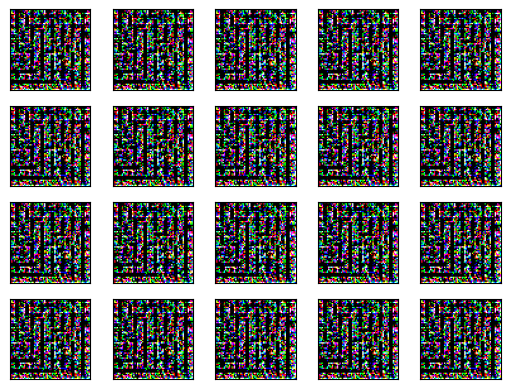

In [439]:
y_pred = model.generator.predict(fixed_noise)
show_images(y_pred)